In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
import sys
sys.path.insert(1, '..')
from utils import functions as func

In [4]:
X_train, X_test, y_train, y_test = func.load_train_sets(path = "data\processed/train_set.npz")
X_train_corr, X_test_corr, y_train_corr, y_test_corr = func.load_train_sets(path = "data\processed/train_set_corr.npz")
X_train_norm, X_test_norm, y_train_norm, y_test_norm = func.load_train_sets(path = "data\processed/train_set_norm.npz")
X_norm_corr, X_norm_corr, y_norm_corr, y_norm_corr = func.load_train_sets(path = "data\processed/train_norm_corr.npz")

In [5]:
param_random_forest = {"n_estimators": [100, 200, 500], 

                     
                     "max_depth": [5,10,15,20],
                      
                     "max_features": [4,5,7] 
                                                    
                     }
grid_rand_clas = GridSearchCV(estimator = RandomForestClassifier(),
                  param_grid = param_random_forest,
                  cv = 3)   

In [6]:
grid_rand_clas.fit(X_train,y_train) 

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [4, 5, 7],
                         'n_estimators': [100, 200, 500]})

In [7]:
print(grid_rand_clas.best_estimator_)
print(grid_rand_clas.best_score_)
print(grid_rand_clas.best_params_)

RandomForestClassifier(max_depth=20, max_features=4)
0.9952422221594192
{'max_depth': 20, 'max_features': 4, 'n_estimators': 100}


In [8]:
pred_rand_clas = grid_rand_clas.best_estimator_.predict(X_test)

In [9]:
accuracy_score(y_test, pred_rand_clas)

0.9364341085271318

In [10]:
c_matrix = confusion_matrix(y_test, pred_rand_clas)

In [11]:
c_matrix

array([[1122,   27,    1,    0,    0,    0,    0],
       [  16,   66,   10,    2,    0,    0,    0],
       [   1,   10,    9,    5,    1,    1,    0],
       [   0,    2,    0,    6,    0,    2,    0],
       [   0,    0,    0,    1,    3,    1,    0],
       [   0,    0,    0,    0,    1,    1,    0],
       [   0,    0,    0,    0,    0,    1,    1]], dtype=int64)

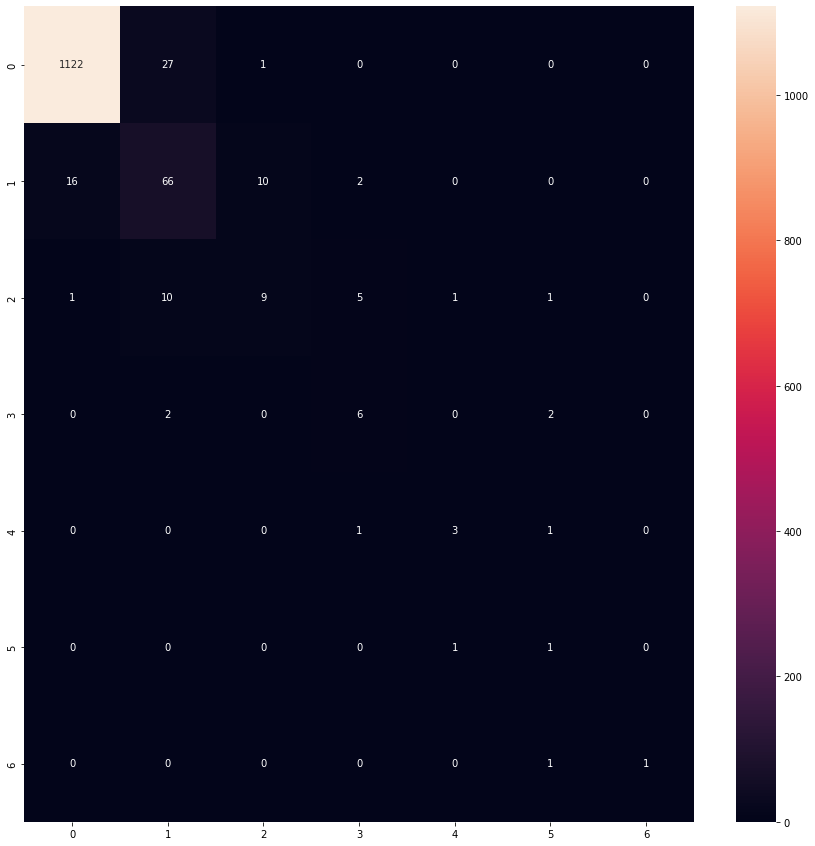

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(c_matrix, annot=True, fmt='d');
plt.savefig("D:\Jesus\BootCampThe_Bridge\Clases\Alumno\Entregables\Proyecto_ML\src\data\images\conf_matrix.jpg")